In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from IPython.display import display

In [3]:
dataset = pd.read_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Python\MyProjects\Matplotlib & Seaborn\Dataset\File CSV\retail_raw_reduced.csv")

print("Shape of dataset = %d Baris & %d Kolom "%dataset.shape)
print("Informasi dataset = ")
display(dataset.info())
print("Mengecek Missing Value : ")
display(dataset.isnull().sum())
print("Statistik Dasar dataset : ")
display(dataset.describe())
display(dataset.head())

Shape of dataset = 5000 Baris & 9 Kolom 
Informasi dataset = 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     5000 non-null   int64 
 1   order_date   5000 non-null   object
 2   customer_id  5000 non-null   int64 
 3   city         5000 non-null   object
 4   province     5000 non-null   object
 5   product_id   5000 non-null   object
 6   brand        5000 non-null   object
 7   quantity     5000 non-null   int64 
 8   item_price   5000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 351.7+ KB


None

Mengecek Missing Value : 


order_id       0
order_date     0
customer_id    0
city           0
province       0
product_id     0
brand          0
quantity       0
item_price     0
dtype: int64

Statistik Dasar dataset : 


,order_id,customer_id,quantity,item_price
count,5.000000e+03,5000.000000,5000.000000,5.000000e+03
mean,1.707214e+06,15474.832600,11.407200,9.345866e+05
std,2.152582e+04,1650.211651,29.404536,1.031427e+06
min,1.666774e+06,12391.000000,1.000000,2.600000e+04
25%,1.688852e+06,14096.000000,2.000000,4.500000e+05
50%,1.708448e+06,15492.500000,5.000000,6.040000e+05
75%,1.725623e+06,16916.000000,12.000000,1.045000e+06
max,1.742998e+06,18287.000000,720.000000,2.976200e+07


,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


In [4]:
dataset["order_month"] = dataset["order_date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%Y-%m"))
dataset["gmv"] = dataset["quantity"] * dataset["item_price"]

display(dataset.head())

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08,820000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000


In [34]:
df_mounth_amount = dataset.groupby(["order_month"])["gmv"].sum().reset_index()
xaxis_lineplot = df_mounth_amount["order_month"].to_list()
display(df_mounth_amount.head())

,order_month,gmv
0,2019-07,3524041000
1,2019-08,4452923000
2,2019-09,3947002000
3,2019-10,6719937000
4,2019-11,6182229000


## Lineplot order_date vs gmv

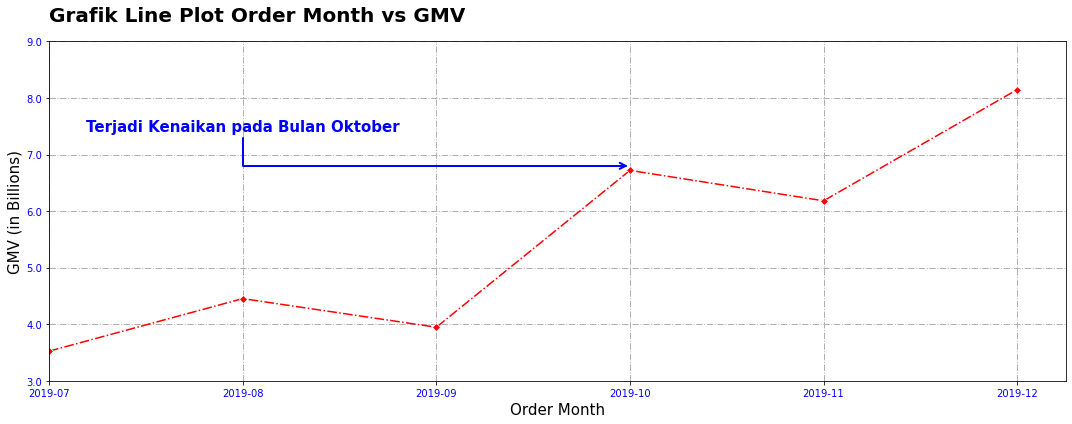

In [103]:
fig, axs = plt.subplots(1, 1, figsize=(15, 6))
sns.lineplot(data=df_mounth_amount, x="order_month", y="gmv", marker="D", sizes=30, linestyle="-.", color="red", ax=axs)
axs.set_title("Grafik Line Plot Order Month vs GMV", fontsize=20, fontweight="bold", color="black", pad=20, loc="left")
axs.set_xlim(0)
axs.set_xticks(axs.get_xticks())
axs.set_xticklabels(xaxis_lineplot, c="blue")
axs.set_xlabel("Order Month", fontsize=15)
axs.set_yticks(axs.get_yticks())
axs.set_yticklabels(axs.get_yticks()/1000000000, c="blue")
axs.set_ylabel("GMV (in Billions)", fontsize=15)
axs.annotate(
                "Terjadi Kenaikan pada Bulan Oktober",
                xy=(3, 6800000000),
                weight="bold",
                color="blue",
                fontsize=15,
                ha="center",
                va="center",
                xytext=(1, 7500000000),
                arrowprops=dict(
                                arrowstyle="->",
                                connectionstyle="angle",
                                linewidth="2",
                                color="blue"
                               )
            )
axs.grid(linestyle="-.", linewidth=1)
plt.tight_layout()
plt.savefig("../File Image/Lineplot_image.png", dpi=300, facecolor="white")
plt.show()

## Pointplot order_date vs gmv

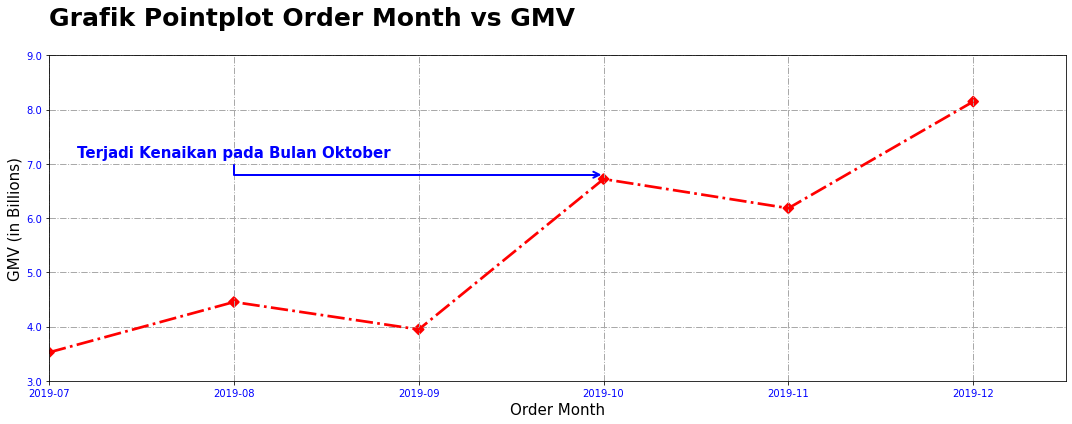

In [102]:
fig, axs = plt.subplots(1, 1, figsize=(15, 6))
sns.pointplot(data=df_mounth_amount, x="order_month", y="gmv", markers="D", linestyles="-.", color="red")
axs.set_title("Grafik Pointplot Order Month vs GMV", fontsize=25, fontweight="bold", loc="left", pad=30)
axs.set_xlim(0)
axs.set_xticklabels(axs.get_xticklabels(), color="blue")
axs.set_xlabel("Order Month", fontsize=15)
axs.set_yticks(axs.get_yticks())
axs.set_yticklabels(axs.get_yticks()/1000000000, color="blue")
axs.set_ylabel("GMV (in Billions)", fontsize=15)
axs.annotate(
             "Terjadi Kenaikan pada Bulan Oktober",
             xy=(3, 6800000000),
             ha="center",
             va="center",
             color="blue",
             fontsize=15,
             weight="bold",
             xytext=(1, 7200000000),
             arrowprops=dict(
                             arrowstyle="->",
                             connectionstyle="angle",
                             linewidth=2,
                             color="blue"
                            )
            )
axs.grid(color="darkgray", linestyle="-.", linewidth=1)
plt.tight_layout()
plt.savefig("../File Image/Pointplot_image.png", dpi=300, facecolor="white")
plt.show()